In [55]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/total-worldwide-passenger-cars-sales/scraped_data.csv


# **Import**

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

# **1. Data Import & Structure**

In [57]:
df = pd.read_csv('/kaggle/input/total-worldwide-passenger-cars-sales/scraped_data.csv')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Country     141 non-null    object
 1   2005 Sales  140 non-null    object
 2   2006 Sales  140 non-null    object
 3   2007 Sales  140 non-null    object
 4   2008 Sales  140 non-null    object
 5   2009 Sales  140 non-null    object
 6   2010 Sales  140 non-null    object
 7   2011 Sales  140 non-null    object
 8   2012 Sales  140 non-null    object
 9   2013 Sales  140 non-null    object
 10  2014 Sales  140 non-null    object
 11  2015 Sales  141 non-null    object
 12  2016 Sales  138 non-null    object
 13  2017 Sales  140 non-null    object
 14  2018 Sales  140 non-null    object
 15  2019 Sales  140 non-null    object
 16  2020 Sales  57 non-null     object
 17  2021 Sales  58 non-null     object
 18  2022 Sales  57 non-null     object
dtypes: object(19)
memory usage: 21.1+ KB


In [59]:
df.shape

(141, 19)

In [60]:
df.describe()

,Country,2005 Sales,2006 Sales,2007 Sales,2008 Sales,2009 Sales,2010 Sales,2011 Sales,2012 Sales,2013 Sales,2014 Sales,2015 Sales,2016 Sales,2017 Sales,2018 Sales,2019 Sales,2020 Sales,2021 Sales,2022 Sales
count,141,140,140,140,140,140,140,140,140,140,140,141,138,140,140,140,57,58,57
unique,141,114,110,114,114,106,110,111,114,118,129,129,124,136,138,139,57,58,57
top,China,"2,000","1,000","3,000","3,000","3,000","2,000","3,000","2,000","2,000",200,"4,000","4,300","5,260","22,612","3,000","20,177,731","21,481,537","23,563,287"
freq,1,6,5,5,8,8,10,10,7,7,3,3,3,2,2,2,1,1,1


**Missing Value Check**

In [61]:
df.isnull().sum()

Country        0
2005 Sales     1
2006 Sales     1
2007 Sales     1
2008 Sales     1
2009 Sales     1
2010 Sales     1
2011 Sales     1
2012 Sales     1
2013 Sales     1
2014 Sales     1
2015 Sales     0
2016 Sales     3
2017 Sales     1
2018 Sales     1
2019 Sales     1
2020 Sales    84
2021 Sales    83
2022 Sales    84
dtype: int64

**Duplicated value check**

In [62]:
df.duplicated().sum()

0

In [63]:
df.head()

,Country,2005 Sales,2006 Sales,2007 Sales,2008 Sales,2009 Sales,2010 Sales,2011 Sales,2012 Sales,2013 Sales,2014 Sales,2015 Sales,2016 Sales,2017 Sales,2018 Sales,2019 Sales,2020 Sales,2021 Sales,2022 Sales
0,China,"3,971,101","5,175,961","6,297,538","6,755,609","10,331,315","13,757,794","14,472,416","15,495,240","17,927,730","19,707,677","21,210,339","24,376,902","24,718,321","23,709,782","21,472,092","20,177,731","21,481,537","23,563,287"
1,India,"1,106,863","1,311,373","1,511,812","1,545,414","1,816,878","2,387,197","2,510,313","2,781,919","2,553,979","2,570,736","2,772,270","2,966,637","3,229,109","3,394,756","2,962,115","2,433,464","3,082,279","3,792,356"
2,Japan,"4,748,482","4,612,318","4,325,508","4,184,266","3,905,310","4,203,181","3,509,036","4,572,333","4,562,282","4,699,591","4,215,889","4,146,459","4,386,378","4,391,160","4,301,091","3,809,977","3,675,698","3,448,297"
3,USA,"7,659,983","7,761,592","7,562,334","6,769,107","5,400,890","5,635,432","6,089,403","7,241,900","7,585,341","7,749,432","7,516,826","6,872,729","6,080,229","5,303,580","4,719,710","3,401,838","3,350,050","2,858,575"
4,Germany,"3,319,259","3,467,961","3,148,163","3,090,040","3,807,175","2,916,259","3,173,634","3,082,504","2,952,431","3,036,773","3,206,042","3,351,607","3,441,262","3,435,778","3,607,258","2,917,678","2,622,132","2,651,357"


# **2. Data Transform**

**Columns type change**

In [66]:
cols = df.iloc[:,1:20].columns

In [70]:
# Change the type

for i in cols:
    df[i] = df[i].str.replace(',', '').astype(float)

In [72]:
for i in cols:
    df[i] = df[i].fillna(df[i].mean())

**Data Check**

In [73]:
df.head()

,Country,2005 Sales,2006 Sales,2007 Sales,2008 Sales,2009 Sales,2010 Sales,2011 Sales,2012 Sales,2013 Sales,2014 Sales,2015 Sales,2016 Sales,2017 Sales,2018 Sales,2019 Sales,2020 Sales,2021 Sales,2022 Sales
0,China,3971101.0,5175961.0,6297538.0,6755609.0,10331315.0,13757794.0,14472416.0,15495240.0,17927730.0,19707677.0,21210339.0,24376902.0,24718321.0,23709782.0,21472092.0,20177731.0,21481537.0,23563287.0
1,India,1106863.0,1311373.0,1511812.0,1545414.0,1816878.0,2387197.0,2510313.0,2781919.0,2553979.0,2570736.0,2772270.0,2966637.0,3229109.0,3394756.0,2962115.0,2433464.0,3082279.0,3792356.0
2,Japan,4748482.0,4612318.0,4325508.0,4184266.0,3905310.0,4203181.0,3509036.0,4572333.0,4562282.0,4699591.0,4215889.0,4146459.0,4386378.0,4391160.0,4301091.0,3809977.0,3675698.0,3448297.0
3,USA,7659983.0,7761592.0,7562334.0,6769107.0,5400890.0,5635432.0,6089403.0,7241900.0,7585341.0,7749432.0,7516826.0,6872729.0,6080229.0,5303580.0,4719710.0,3401838.0,3350050.0,2858575.0
4,Germany,3319259.0,3467961.0,3148163.0,3090040.0,3807175.0,2916259.0,3173634.0,3082504.0,2952431.0,3036773.0,3206042.0,3351607.0,3441262.0,3435778.0,3607258.0,2917678.0,2622132.0,2651357.0


# **3. Data Visualization**

In [77]:
# Data for Visualization
df2 = df

In [155]:
df2.head()

,Country,2005 Sales,2006 Sales,2007 Sales,2008 Sales,2009 Sales,2010 Sales,2011 Sales,2012 Sales,2013 Sales,2014 Sales,2015 Sales,2016 Sales,2017 Sales,2018 Sales,2019 Sales,2020 Sales,2021 Sales,2022 Sales
0,China,3971101.0,5175961.0,6297538.0,6755609.0,10331315.0,13757794.0,14472416.0,15495240.0,17927730.0,19707677.0,21210339.0,24376902.0,24718321.0,23709782.0,21472092.0,20177731.0,21481537.0,23563287.0
1,India,1106863.0,1311373.0,1511812.0,1545414.0,1816878.0,2387197.0,2510313.0,2781919.0,2553979.0,2570736.0,2772270.0,2966637.0,3229109.0,3394756.0,2962115.0,2433464.0,3082279.0,3792356.0
2,Japan,4748482.0,4612318.0,4325508.0,4184266.0,3905310.0,4203181.0,3509036.0,4572333.0,4562282.0,4699591.0,4215889.0,4146459.0,4386378.0,4391160.0,4301091.0,3809977.0,3675698.0,3448297.0
3,USA,7659983.0,7761592.0,7562334.0,6769107.0,5400890.0,5635432.0,6089403.0,7241900.0,7585341.0,7749432.0,7516826.0,6872729.0,6080229.0,5303580.0,4719710.0,3401838.0,3350050.0,2858575.0
4,Germany,3319259.0,3467961.0,3148163.0,3090040.0,3807175.0,2916259.0,3173634.0,3082504.0,2952431.0,3036773.0,3206042.0,3351607.0,3441262.0,3435778.0,3607258.0,2917678.0,2622132.0,2651357.0


In [81]:
num_cols = df.select_dtypes(include=['float64']).columns

**Boxplot**

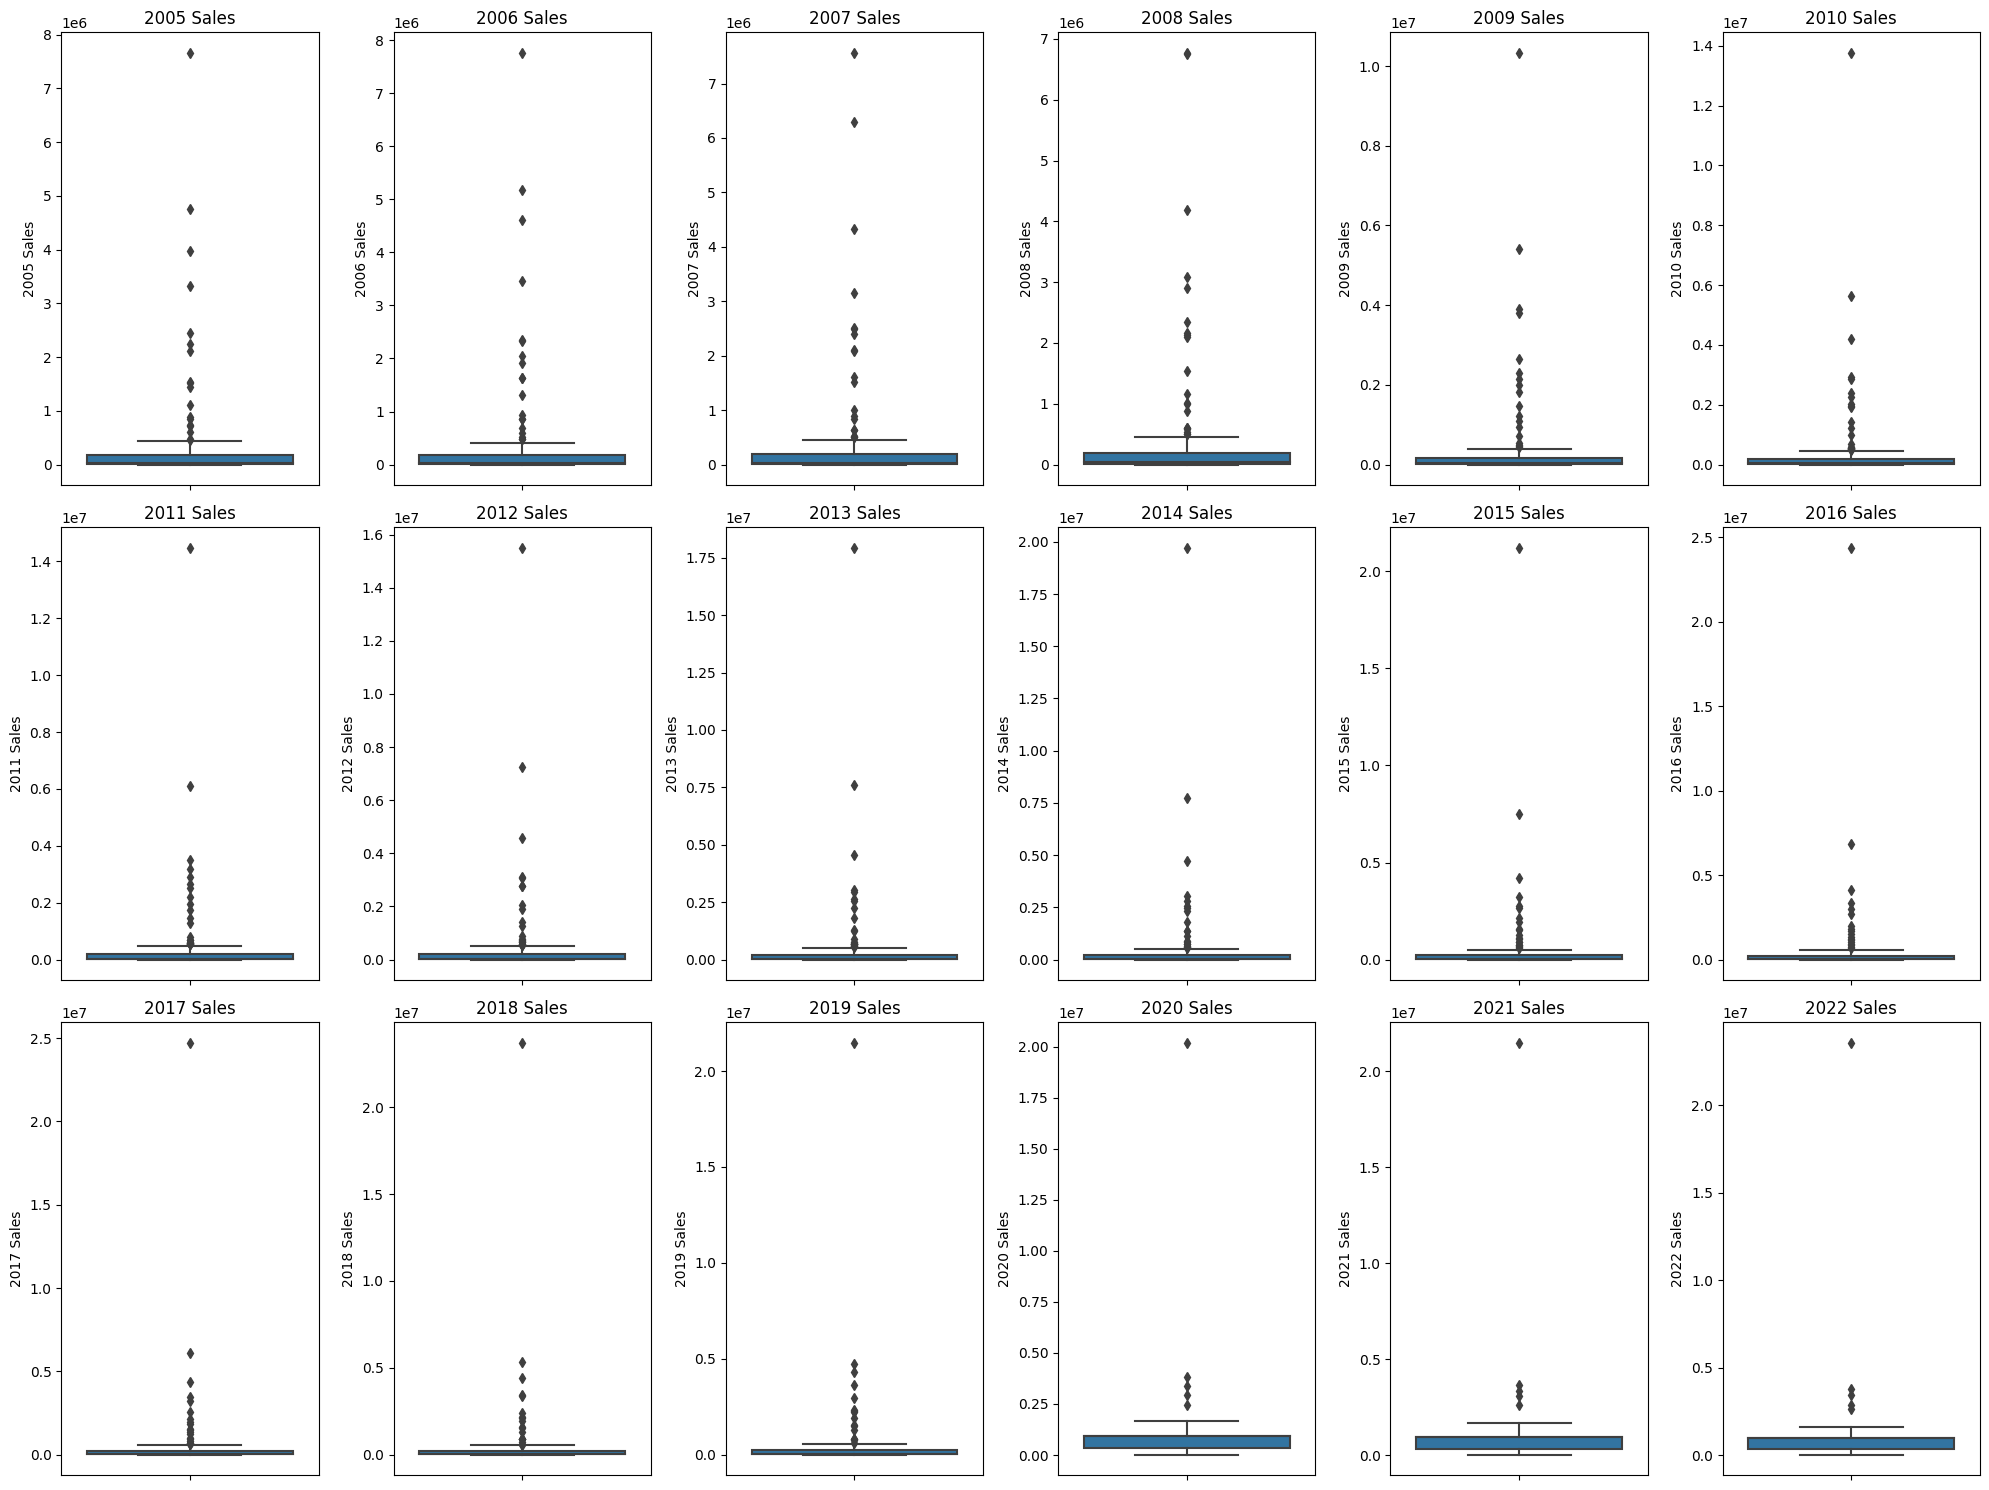

In [85]:
f, ax = plt.subplots(3,6, figsize=(20, 15))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.boxplot(data= df2, y = cols, ax = ax[index])
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show() 

-------------

**2005~2010 Sales in Top10 countries**

In [99]:
top10_2005 = df2.groupby(['Country'])['2005 Sales'].sum().reset_index().sort_values(by='2005 Sales', ascending=False)[1:11]
top10_2006 = df2.groupby(['Country'])['2006 Sales'].sum().reset_index().sort_values(by='2006 Sales', ascending=False)[1:11]
top10_2007 = df2.groupby(['Country'])['2007 Sales'].sum().reset_index().sort_values(by='2007 Sales', ascending=False)[1:11]
top10_2008 = df2.groupby(['Country'])['2008 Sales'].sum().reset_index().sort_values(by='2008 Sales', ascending=False)[1:11]
top10_2009 = df2.groupby(['Country'])['2009 Sales'].sum().reset_index().sort_values(by='2009 Sales', ascending=False)[1:11]
top10_2010 = df2.groupby(['Country'])['2010 Sales'].sum().reset_index().sort_values(by='2010 Sales', ascending=False)[1:11]

In [127]:
Country_0506 = pd.merge(top10_2005, top10_2006, on = 'Country', how = 'outer')
Country_0507 = pd.merge(Country_0506, top10_2007, on = 'Country', how = 'outer')
Country_0508 = pd.merge(Country_0507, top10_2008, on = 'Country', how = 'outer')
Country_0509 = pd.merge(Country_0508, top10_2009, on = 'Country', how = 'outer')
Country_0510 = pd.merge(Country_0509, top10_2010, on = 'Country', how = 'outer')

In [128]:
Country_0510 

,Country,2005 Sales,2006 Sales,2007 Sales,2008 Sales,2009 Sales,2010 Sales
0,Brazil,1439822.0,1632947.0,2085718.0,2341300.0,2643862.0,2856540.0
1,China,3971101.0,5175961.0,6297538.0,6755609.0,NaN,NaN
2,France,2118042.0,2045745.0,2109672.0,2091369.0,2302398.0,2251669.0
3,Germany,3319259.0,3467961.0,3148163.0,3090040.0,3807175.0,2916259.0
4,India,1106863.0,1311373.0,1511812.0,1545414.0,1816878.0,2387197.0
5,Iran,NaN,NaN,NaN,NaN,NaN,1410403.0
6,Italy,2244108.0,2335462.0,2494115.0,2161359.0,2159465.0,1961580.0
7,Japan,4748482.0,4612318.0,4325508.0,4184266.0,3905310.0,4203181.0
8,Russia,1520225.0,1911240.0,2514920.0,2897459.0,1465742.0,1912794.0
9,South Korea,NaN,NaN,NaN,NaN,1221118.0,NaN


In [145]:
fig = make_subplots(rows=3, cols=2)

fig.add_trace(go.Bar(x = Country_0510['Country'], y = Country_0510['2005 Sales'], name = '2005 Sales'), row=1, col=1)
fig.add_trace(go.Bar(x = Country_0510['Country'], y = Country_0510['2006 Sales'], name = '2006 Sales'), row=1, col=2)
fig.add_trace(go.Bar(x = Country_0510['Country'], y = Country_0510['2007 Sales'], name = '2007 Sales'), row=2, col=1)
fig.add_trace(go.Bar(x = Country_0510['Country'], y = Country_0510['2008 Sales'], name = '2008 Sales'), row=2, col=2)
fig.add_trace(go.Bar(x = Country_0510['Country'], y = Country_0510['2009 Sales'], name = '2009 Sales'), row=3, col=1)
fig.add_trace(go.Bar(x = Country_0510['Country'], y = Country_0510['2010 Sales'], name = '2010 Sales'), row=3, col=2)

fig.update_layout(title_text="2005~2010 Sales in Top10 countries")

---------

**2011~2016 Sales in Top10 countries**

In [146]:
top10_2011 = df2.groupby(['Country'])['2011 Sales'].sum().reset_index().sort_values(by='2011 Sales', ascending=False)[1:11]
top10_2012 = df2.groupby(['Country'])['2012 Sales'].sum().reset_index().sort_values(by='2012 Sales', ascending=False)[1:11]
top10_2013 = df2.groupby(['Country'])['2013 Sales'].sum().reset_index().sort_values(by='2013 Sales', ascending=False)[1:11]
top10_2014 = df2.groupby(['Country'])['2014 Sales'].sum().reset_index().sort_values(by='2014 Sales', ascending=False)[1:11]
top10_2015 = df2.groupby(['Country'])['2015 Sales'].sum().reset_index().sort_values(by='2015 Sales', ascending=False)[1:11]
top10_2016 = df2.groupby(['Country'])['2016 Sales'].sum().reset_index().sort_values(by='2016 Sales', ascending=False)[1:11]

In [150]:
Country_1112 = pd.merge(top10_2011, top10_2012, on = 'Country', how = 'outer')
Country_1113 = pd.merge(Country_1112, top10_2013, on = 'Country', how = 'outer')
Country_1114 = pd.merge(Country_1113, top10_2014, on = 'Country', how = 'outer')
Country_1115 = pd.merge(Country_1114, top10_2015, on = 'Country', how = 'outer')
Country_1116 = pd.merge(Country_1115, top10_2016, on = 'Country', how = 'outer')

In [148]:
Country_1116

,Country,2011 Sales,2012 Sales,2013 Sales,2014 Sales,2015 Sales,2016 Sales
0,Brazil,2901647.0,3115223.0,3040783.0,2794687.0,2123009.0,1676722.0
1,France,2204229.0,1898760.0,1790456.0,1795885.0,1917226.0,2015177.0
2,Germany,3173634.0,3082504.0,2952431.0,3036773.0,3206042.0,3351607.0
3,India,2510313.0,2781919.0,2553979.0,2570736.0,2772270.0,2966637.0
4,Iran,1452965.0,NaN,NaN,NaN,NaN,1320300.0
5,Italy,1749740.0,1403010.0,1304648.0,1360578.0,1575737.0,1824968.0
6,Japan,3509036.0,4572333.0,4562282.0,4699591.0,4215889.0,4146459.0
7,Russia,2653688.0,2755384.0,2649181.0,2333067.0,1282740.0,NaN
8,South Korea,NaN,1256403.0,1243868.0,1359834.0,1533670.0,1533813.0
9,UK,1941253.0,2044609.0,2264737.0,2476435.0,2633503.0,2692786.0


In [149]:
fig = make_subplots(rows=3, cols=2)

fig.add_trace(go.Bar(x = Country_1116['Country'], y = Country_1116['2011 Sales'], name = '2011 Sales'), row=1, col=1)
fig.add_trace(go.Bar(x = Country_1116['Country'], y = Country_1116['2012 Sales'], name = '2012 Sales'), row=1, col=2)
fig.add_trace(go.Bar(x = Country_1116['Country'], y = Country_1116['2013 Sales'], name = '2013 Sales'), row=2, col=1)
fig.add_trace(go.Bar(x = Country_1116['Country'], y = Country_1116['2014 Sales'], name = '2014 Sales'), row=2, col=2)
fig.add_trace(go.Bar(x = Country_1116['Country'], y = Country_1116['2015 Sales'], name = '2015 Sales'), row=3, col=1)
fig.add_trace(go.Bar(x = Country_1116['Country'], y = Country_1116['2016 Sales'], name = '2016 Sales'), row=3, col=2)

fig.update_layout(title_text="2011~2016 Sales in Top10 countries")

-------------

**2017~2022 Sales in Top10 countries**

In [159]:
top10_2017 = df2.groupby(['Country'])['2017 Sales'].sum().reset_index().sort_values(by='2017 Sales', ascending=False)[1:11]
top10_2018 = df2.groupby(['Country'])['2018 Sales'].sum().reset_index().sort_values(by='2018 Sales', ascending=False)[1:11]
top10_2019 = df2.groupby(['Country'])['2019 Sales'].sum().reset_index().sort_values(by='2019 Sales', ascending=False)[1:11]
top10_2020 = df2.groupby(['Country'])['2020 Sales'].sum().reset_index().sort_values(by='2020 Sales', ascending=False)[1:11]
top10_2021 = df2.groupby(['Country'])['2021 Sales'].sum().reset_index().sort_values(by='2021 Sales', ascending=False)[1:11]
top10_2022 = df2.groupby(['Country'])['2022 Sales'].sum().reset_index().sort_values(by='2022 Sales', ascending=False)[1:11]

In [156]:
Country_1718 = pd.merge(top10_2017, top10_2018, on = 'Country', how = 'outer')
Country_1719 = pd.merge(Country_1718, top10_2019, on = 'Country', how = 'outer')
Country_1720 = pd.merge(Country_1719, top10_2020, on = 'Country', how = 'outer')
Country_1721 = pd.merge(Country_1720, top10_2021, on = 'Country', how = 'outer')
Country_1722 = pd.merge(Country_1721, top10_2022, on = 'Country', how = 'outer')

In [157]:
Country_1722 

,Country,2017 Sales,2018 Sales,2019 Sales,2020 Sales,2021 Sales,2022 Sales
0,Brazil,1856450.0,2101884.0,2262069.0,1615942.0,1558467.0,1.576666e+06
1,France,2110748.0,2173481.0,2214280.0,1650126.0,1659005.0,1.532035e+06
2,Germany,3441262.0,3435778.0,3607258.0,2917678.0,2622132.0,2.651357e+06
3,India,3229109.0,3394756.0,2962115.0,2433464.0,3082279.0,3.792356e+06
4,Italy,1970497.0,1910025.0,1916949.0,1381496.0,1456674.0,1.316919e+06
5,Japan,4386378.0,4391160.0,4301091.0,3809977.0,3675698.0,3.448297e+06
6,N. Caledonia,NaN,NaN,NaN,NaN,NaN,9.886049e+05
7,Russia,1448700.0,1606676.0,1567809.0,1433956.0,1483444.0,NaN
8,South Korea,1526660.0,1525150.0,1497035.0,1618333.0,1468873.0,1.420486e+06
9,UK,2540617.0,2367147.0,2311140.0,1631064.0,1647181.0,1.614063e+06


In [158]:
fig = make_subplots(rows=3, cols=2)

fig.add_trace(go.Bar(x = Country_1722['Country'], y = Country_1722['2017 Sales'], name = '2017 Sales'), row=1, col=1)
fig.add_trace(go.Bar(x = Country_1722['Country'], y = Country_1722['2018 Sales'], name = '2018 Sales'), row=1, col=2)
fig.add_trace(go.Bar(x = Country_1722['Country'], y = Country_1722['2019 Sales'], name = '2019 Sales'), row=2, col=1)
fig.add_trace(go.Bar(x = Country_1722['Country'], y = Country_1722['2020 Sales'], name = '2020 Sales'), row=2, col=2)
fig.add_trace(go.Bar(x = Country_1722['Country'], y = Country_1722['2021 Sales'], name = '2021 Sales'), row=3, col=1)
fig.add_trace(go.Bar(x = Country_1722['Country'], y = Country_1722['2022 Sales'], name = '2022 Sales'), row=3, col=2)

fig.update_layout(title_text="2011~2016 Sales in Top10 countries")

------------

In [193]:
Sales_cols = ['2005 Sales','2006 Sales','2007 Sales','2008 Sales','2009 Sales','2010 Sales','2011 Sales','2012 Sales','2013 Sales','2014 Sales','2015 Sales','2016 Sales','2017 Sales','2018 Sales','2019 Sales','2020 Sales','2021 Sales','2022 Sales']
df2 = df.melt(id_vars = ['Country'], value_vars = Sales_cols, var_name='Year', value_name='Sales')
df2['Year'] = df2['Year'].str.extract(r'(\d{4})')
df2.head()

,Country,Year,Sales
0,China,2005,3971101.0
1,India,2005,1106863.0
2,Japan,2005,4748482.0
3,USA,2005,7659983.0
4,Germany,2005,3319259.0


**change in USA sales**

In [201]:
Sales = df2.groupby(['Year','Country'])['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)

In [210]:
USA_Sales = Sales.loc[Sales['Country'] == 'USA', :].reset_index().sort_values(by='Year', ascending=True)

In [211]:
USA_Sales

,index,Year,Country,Sales
2,131,2005,USA,7659983.0
0,272,2006,USA,7761592.0
4,413,2007,USA,7562334.0
8,554,2008,USA,6769107.0
12,695,2009,USA,5400890.0
11,836,2010,USA,5635432.0
9,977,2011,USA,6089403.0
6,1118,2012,USA,7241900.0
3,1259,2013,USA,7585341.0
1,1400,2014,USA,7749432.0


In [212]:
fig = px.line(USA_Sales, x='Year', y='Sales',
              title='change in USA sales')


fig.update_xaxes(ticks="outside", dtick=1)
fig.show()

---------

**change in South Korea sales**

In [213]:
Kor_Sales = Sales.loc[Sales['Country'] == 'South Korea', :].reset_index().sort_values(by='Year', ascending=True)

In [214]:
Kor_Sales

,index,Year,Country,Sales
17,114,2005,South Korea,893159.0
16,255,2006,South Korea,932650.0
15,396,2007,South Korea,1010790.0
14,537,2008,South Korea,1017595.0
13,678,2009,South Korea,1221118.0
12,819,2010,South Korea,1237482.0
9,960,2011,South Korea,1293501.0
10,1101,2012,South Korea,1256403.0
11,1242,2013,South Korea,1243868.0
8,1383,2014,South Korea,1359834.0


In [216]:
fig = px.line(Kor_Sales, x='Year', y='Sales',
              title='change in South Korea sales')


fig.update_xaxes(ticks="outside", dtick=1)
fig.show()

---------------

**Please leave your advice in the comments. Thank you**